# Homework 1
## DSE 220: Machine Learning
## Due Date: 13 April 2017
## Orysya Stus

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2. Data
Download the 'wine_modified' and 'wine' (train, validation, and test) data from github. Use the 'wine_modified' data for the data preprocessing section and the wine train, validation, and test data for the other two sections.

In [2]:
!pwd

C:\Users\Orysya\Desktop\DSE-220\homeworks\homework_1


In [3]:
wine = pd.read_csv('./wine_modified.csv')
print('The shape of wine is', wine.shape)
wine.head()

The shape of wine is (178, 14)


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,NaN,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,NaN,2.50,NaN,NaN,3.85,NaN,NaN,NaN,7.80,NaN,NaN,NaN
4,1.0,13.24,2.59,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X_train = pd.read_csv('./wine_train_data.csv')
y_train = pd.read_csv('./wine_train_labels.csv')
X_valid = pd.read_csv('./wine_val_data.csv')
y_valid = pd.read_csv('./wine_val_labels.csv')
X_test = pd.read_csv('./wine_test_data.csv')
y_test = pd.read_csv('./wine_test_labels.csv')
print('The shape of X_train is', X_train.shape)
print('The shape of y_train is', y_train.shape)
print('The shape of X_valid is', X_valid.shape)
print('The shape of y_valid is', y_valid.shape)
print('The shape of X_test is', X_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of X_train is (100, 13)
The shape of y_train is (100, 1)
The shape of X_valid is (39, 13)
The shape of y_valid is (39, 1)
The shape of X_test is (39, 13)
The shape of y_test is (39, 1)


In [5]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
1,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
2,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
3,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290
4,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [6]:
y_train.head()

,class
0,3
1,2
2,1
3,2
4,1


## 3. Data Preprocessing
The questions in this section are sequential steps. So use the data obtained after Question 1 for Question 2 and so on.

### Question 1: 
Remove the rows with missing labels('class') and rows with more than 7 missing features. Report the remaining number of rows.

In [7]:
print('Prior to preprocessing, there are', wine.shape[0], 'rows in the dataframe.')
wine = wine[np.isfinite(wine['class'])]
print('After dropping missing labels, there are', wine.shape[0], 'rows in the dataframe.')
wine = wine.dropna(thresh=8)
print('After dropping rows with more than 7 missing features (>7 missing features), there are', wine.shape[0], 'rows in the dataframe and', wine.shape[1], 'columns in the dataframe.')
wine.head()

Prior to preprocessing, there are 178 rows in the dataframe.
After dropping missing labels, there are 168 rows in the dataframe.
After dropping rows with more than 7 missing features (>7 missing features), there are 154 rows in the dataframe and 14 columns in the dataframe.


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,NaN,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,13.24,2.59,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,1.0,14.20,1.76,NaN,15.2,112.0,3.27,NaN,0.34,1.97,6.75,1.05,2.85,1450.0


### Question 2: 
Remove features > 50% of missing values. For other features with missing values fill them with the mean of the corresponding features. Report the removed features (if any) and standard deviation of features with missing values after filling.

In [8]:
wine1 = wine.loc[:, pd.notnull(wine).sum()>len(wine)*0.5]
col_50drop = wine.columns[pd.notnull(wine).sum()<len(wine)*0.5].tolist()
print('After removing features >50% of missing values, there are', wine1.shape[0], 'rows in the dataframe and', wine1.shape[1], 'columns in the dataframe. The column/feature', col_50drop, 'was dropped.')
wine1.head()

After removing features >50% of missing values, there are 154 rows in the dataframe and 13 columns in the dataframe. The column/feature ['Ash'] was dropped.


,class,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1.0,14.23,1.71,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
4,1.0,13.24,2.59,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,1.0,14.20,1.76,15.2,112.0,3.27,NaN,0.34,1.97,6.75,1.05,2.85,1450.0


In [9]:
cols_miss_vals = wine1.columns[pd.isnull(wine1).sum() > 0].tolist()
print('Stds before filling nulls for the features with missing values\n', wine1[cols_miss_vals].std())
wine = wine1.fillna(wine1.mean())
print('\nStds after fillings nulls for the features with missing values\n', wine[cols_miss_vals].std())

Stds before filling nulls for the features with missing values
 Magnesium     14.884800
Flavanoids     0.994727
dtype: float64

Stds after fillings nulls for the features with missing values
 Magnesium     14.440377
Flavanoids     0.873573
dtype: float64


In [10]:
wine.describe()

,class,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1.974026,12.305935,2.350455,19.645455,99.496552,2.267403,1.937983,0.366753,1.582273,4.982338,0.954455,2.592013,727.006494
std,0.766522,3.804067,1.116005,3.456794,14.440377,0.617237,0.873573,0.127083,0.587671,2.325204,0.229412,0.723261,303.033368
min,1.000000,-8.328000,0.740000,10.600000,70.000000,0.980000,0.340000,0.140000,0.410000,1.740000,0.480000,1.270000,278.000000
25%,1.000000,12.290000,1.602500,17.500000,88.000000,1.705000,1.312500,0.270000,1.250000,3.057500,0.772500,1.922500,495.000000
50%,2.000000,12.960000,1.875000,19.550000,98.000000,2.265000,1.937983,0.340000,1.505000,4.600000,0.965000,2.770000,660.000000
75%,3.000000,13.635000,3.115000,21.900000,106.000000,2.740000,2.527500,0.465000,1.915000,6.075000,1.117500,3.170000,918.750000
max,3.000000,14.830000,5.800000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Question 3: 
Detect and remove rows with any outliers/incorrect values in features 'alcohol' and 'proline' (if any). Clearly state the basis of your removal.

### Distributions prior to outlier removal

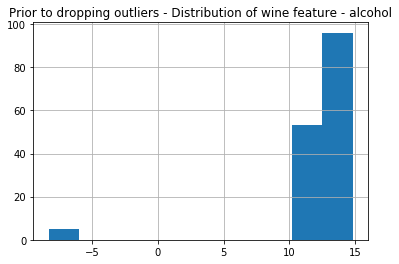

In [11]:
wine['Alcohol'].hist()
plt.title('Prior to dropping outliers - Distribution of wine feature - alcohol')

In [12]:
alcohol_outlier = wine[wine['Alcohol'] < 10]
print('There are', len(alcohol_outlier), 'alcohol related outliers.')
alcohol_outlier

There are 5 alcohol related outliers.


,class,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
22,1.0,-8.226,1.86,16.6,101.000000,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
42,1.0,-8.328,1.89,15.0,99.496552,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0
61,2.0,-7.584,1.36,16.8,100.000000,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0
118,2.0,-7.662,3.43,16.0,80.000000,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0
163,3.0,-7.776,3.45,18.5,106.000000,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0


Outliers are seen for alcohol if the values of alcohol < 10. There are 5 instances in total. These instances should be dropped.

In [13]:
wine = wine[wine['Alcohol'] > 10]
print('After dropping alcohol related outliers, there are', wine.shape[0], 'rows of data.')

After dropping alcohol related outliers, there are 149 rows of data.


Furthermore, the outliers in this feature distribution are not as obvious. In order to determine, if there are any outliers we will keep only the ones that are within +3 to -3 standard deviations in the column.

In [14]:
wine = wine[np.abs(wine.Alcohol - wine.Alcohol.mean()) <= (3*wine.Alcohol.std())]
print('After dropping alcohol related outliers, there are', wine.shape[0], 'rows of data.')

After dropping alcohol related outliers, there are 149 rows of data.


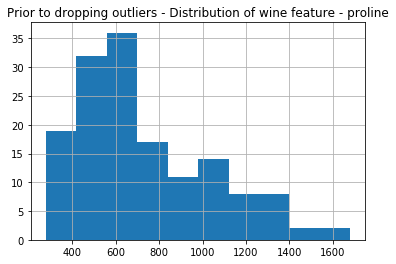

In [15]:
wine['Proline'].hist()
plt.title('Prior to dropping outliers - Distribution of wine feature - proline')

The outliers in this feature distribution are not as obvious. In order to determine, if there are any outliers we will keep only the ones that are within +3 to -3 standard deviations in the column.

In [16]:
wine = wine[np.abs(wine.Proline - wine.Proline.mean()) <= (3*wine.Proline.std())]
print('After dropping proline related outliers, there are', wine.shape[0], 'rows of data.')

After dropping proline related outliers, there are 148 rows of data.


### Distributions after to outlier removal

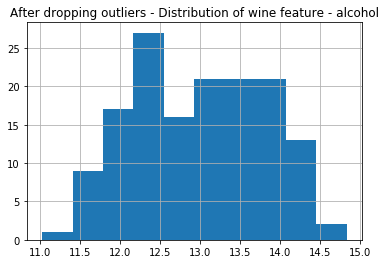

In [17]:
wine['Alcohol'].hist()
plt.title('After dropping outliers - Distribution of wine feature - alcohol')

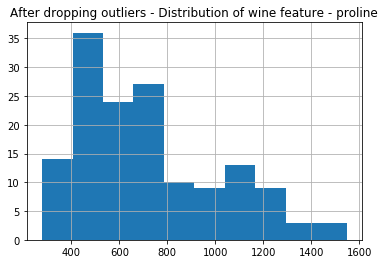

In [18]:
wine['Proline'].hist()
plt.title('After dropping outliers - Distribution of wine feature - proline')

## 4. Decision Trees
Note: When predicting for the test data, you should train the model again using the train + validation data.

### Question 4:
Train Decision Tree model on train data for criterions = {'gini', 'entropy'} and report the accuracies on the validation data. Select the best criterion and report the accuracy on the test data.

For information on gini criterion, you can refer:
http://statweb.stanford.edu/~jtaylo/courses/stats202/restricted/notes/trees.pdf

In [19]:
X_train_total = np.concatenate((X_train,X_valid))
y_train_total = np.concatenate((y_train,y_valid))

In [20]:
best_acc = 0
for i in ['gini', 'entropy']:
    clf = DecisionTreeClassifier(criterion=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    accuracy = np.sum(y_pred == y_valid['class'].values)*1.0/len(y_valid['class'].values)
    print('For criterion =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_criterion = i
        best_acc = accuracy
print('The best criterion is', best_criterion, 'with a validation accuracy of', best_acc)

For criterion = gini the validation accuracy = 0.948717948718
For criterion = entropy the validation accuracy = 0.948717948718
The best criterion is gini with a validation accuracy of 0.948717948718


In [21]:
clf = DecisionTreeClassifier(criterion=best_criterion)
clf.fit(X_train_total, y_train_total)
y_pred = clf.predict(X_test)
print('The test accuracy using criterion =', best_criterion, 'is ' + str(np.sum(y_pred == y_test['class'].values)*1.0/len(y_test['class'].values)))

The test accuracy using criterion = gini is 0.769230769231


### Question 5:
Use the criterion selected above to train Decision Tree model on train data for min samples split=(2,5,10,20) and report the accuracies on the validation data. Select the best parameter and report the accuracy on the test data.

In [22]:
best_acc = 0.0
for i in [2, 5, 10, 20]:
    clf = DecisionTreeClassifier(criterion=best_criterion, min_samples_split=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    accuracy = np.sum(y_pred == y_valid['class'].values)*1.0/len(y_valid['class'].values)
    print('For min_samples_split =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_mss = i
        best_acc = accuracy
print('The best min_samples_split is', best_mss, 'with a validation accuracy of', best_acc)

For min_samples_split = 2 the validation accuracy = 0.974358974359
For min_samples_split = 5 the validation accuracy = 0.948717948718
For min_samples_split = 10 the validation accuracy = 0.948717948718
For min_samples_split = 20 the validation accuracy = 0.948717948718
The best min_samples_split is 2 with a validation accuracy of 0.974358974359


In [23]:
clf = DecisionTreeClassifier(criterion=best_criterion, min_samples_split=best_mss)
clf.fit(X_train_total, y_train_total)
y_pred = clf.predict(X_test)
print('The test accuracy using min_samples_split =', best_mss, 'is ' + str(np.sum(y_pred == y_test['class'].values)*1.0/len(y_test['class'].values)))

The test accuracy using min_samples_split = 2 is 0.74358974359


### Question 6: 
Use the parameters selected above (Q4 and Q5) to train Decision Tree model using the first 20, 40, 60, 80 and 100 samples from train data. Keep the validation set unchanged during this analysis. Report and plot the accuracies on the validation data.

In [24]:
x_train_sampling = [20, 40, 60, 80, 100]
acc = []
for i in x_train_sampling:
    clf = DecisionTreeClassifier(criterion=best_criterion, min_samples_split=best_mss)
    clf.fit(X_train[:i], y_train[:i])
    y_pred = clf.predict(X_valid)
    accuracy = np.sum(y_pred == y_valid['class'].values)*1.0/len(y_valid['class'].values)
    acc.append(accuracy)

Using the first 20 samples, the validation accuracy is 0.74358974359
Using the first 40 samples, the validation accuracy is 0.846153846154
Using the first 60 samples, the validation accuracy is 0.846153846154
Using the first 80 samples, the validation accuracy is 0.948717948718
Using the first 100 samples, the validation accuracy is 0.948717948718


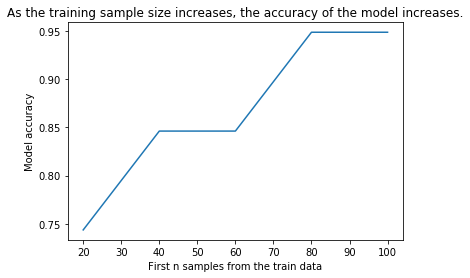

In [25]:
acc_dict = {}
acc_dict = dict(zip(x_train_sampling, acc))
for i, j in acc_dict.items():
    print('Using the first', i, 'samples, the validation accuracy is', j)
    
plot(x_train_sampling, acc);
plt.title('As the training sample size increases, the accuracy of the model increases.');
plt.xlabel('First n samples from the train data');
plt.ylabel('Model accuracy');

## 5. Nearest Neighbor
Normalize Data: Normalize features such that for each feature the mean is 0 and the standard deviation is 1 in the train+validation data. Use the normalizing factors calculated on train+validation data to modify the values in train, validation and test data.

Good normalization reference: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

In [26]:
std_scale = preprocessing.StandardScaler().fit(X_train_total)
X_train_total_scaled = std_scale.transform(X_train_total)

In [27]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(X_train_total_scaled[:,0].mean(), X_train_total_scaled[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(X_train_total_scaled[:,0].std(), X_train_total_scaled[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


Apply the same normalization to the X_train, X_valid, and X_test datasets.

In [28]:
X_train_scaled = std_scale.transform(X_train)
X_valid_scaled = std_scale.transform(X_valid)
X_test_scaled = std_scale.transform(X_test)

Note: The means and the stds of the above normalized data sets will be close to mean=0 and std=1 but not exact.

### Question 7: 
Train k-nn model on train + validation data and report accuracy on test data. Use Euclidean distance and k=3.

Parameter 'p' is the Power parameter for the Minkowski metric.
    
    p = 1 --> Manhattan distance
    p = 2 --> Euclidean distance

In [29]:
clf = KNeighborsClassifier(n_neighbors=3, p= 2)
clf.fit(X_train_total_scaled, y_train_total)
y_pred = clf.predict(X_test_scaled)
accuracy = np.sum(y_pred == y_test['class'].values)*1.0/len(y_test['class'].values)
print('For Euclidean distance and k = 3, the test accuracy is', accuracy)

For Euclidean distance and k = 3, the test accuracy is 0.871794871795


C:\Users\Orysya\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


### Question 8: 
Train the model on train data for distance metrics defined by l1, linf , l2. Report the accuracies on the validation data. Select the best metric and report the accuracy on the test data for the selected metric. Use k=3.

From documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

    “euclidean”	EuclideanDistance (l1)	    sqrt(sum((x - y)^2))
    “manhattan”	ManhattanDistance (l2)	    sum(|x - y|)
    “chebyshev”	ChebyshevDistance (linf)	max(|x - y|)

In [30]:
best_acc = 0.0
for i in ['euclidean', 'manhattan', 'chebyshev']:
    clf = KNeighborsClassifier(n_neighbors=3,metric= i)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_valid_scaled)
    accuracy = np.sum(y_pred == y_valid['class'].values)*1.0/len(y_valid['class'].values)
    print('For metric =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_metric = i
        best_acc = accuracy
print('The best metric is', best_metric, 'with a validation accuracy of', best_acc)

For metric = euclidean the validation accuracy = 0.923076923077
For metric = manhattan the validation accuracy = 0.948717948718
For metric = chebyshev the validation accuracy = 0.923076923077
The best metric is manhattan with a validation accuracy of 0.948717948718


C:\Users\Orysya\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Note: Corresponds to Manhattan_distance (l1).

In [31]:
clf = KNeighborsClassifier(n_neighbors=3, metric= best_metric)
clf.fit(X_train_total_scaled, y_train_total)
y_pred = clf.predict(X_test_scaled)
print('The test accuracy using metric =', best_metric, 'is ' + str(np.sum(y_pred == y_test['class'].values)*1.0/len(y_test['class'].values)))

The test accuracy using metric = manhattan is 0.974358974359


C:\Users\Orysya\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


### Question 9: 
Train the k-nn model on train data for k=1,3,5,7,9. Report and plot the accuracies on the validation data. Select the best 'k' value and report the accuracy on the test data for the selected 'k'. Use Euclidean distance.

In [32]:
best_acc = 0.0
for i in [1, 3, 5, 7, 9]:
    clf = KNeighborsClassifier(n_neighbors= i, p = 2)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_valid_scaled)
    accuracy = np.sum(y_pred == y_valid['class'].values)*1.0/len(y_valid['class'].values)
    print('For k =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_k = i
        best_acc = accuracy
print('The best k is', best_k, 'with a validation accuracy of', best_acc)

For k = 1 the validation accuracy = 0.948717948718
For k = 3 the validation accuracy = 0.923076923077
For k = 5 the validation accuracy = 0.948717948718
For k = 7 the validation accuracy = 0.974358974359
For k = 9 the validation accuracy = 0.948717948718
The best k is 7 with a validation accuracy of 0.974358974359


C:\Users\Orysya\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [33]:
clf = KNeighborsClassifier(n_neighbors= best_k, p = 2)
clf.fit(X_train_total_scaled, y_train_total)
y_pred = clf.predict(X_test_scaled)
print('The test accuracy using k =', best_k, 'is ' + str(np.sum(y_pred == y_test['class'].values)*1.0/len(y_test['class'].values)))

The test accuracy using k = 7 is 0.923076923077


C:\Users\Orysya\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


### Question 10: 
Instead of using full train data, train the model using the first 20, 40, 60, 80 and 100 data samples from train data. Keep the validation set unchanged during this analysis. Report and plot the accuracies on the validation data. Use Euclidean distance and k=3. Note: Don't shuffe the data and use only the 'first n samples', otherwise your answers may differ.

In [34]:
x_train_sampling = [20, 40, 60, 80, 100]
acc = []
for i in x_train_sampling:
    clf = KNeighborsClassifier(n_neighbors= 3, p= 2)
    clf.fit(X_train[:i], y_train[:i])
    y_pred = clf.predict(X_valid)
    accuracy = np.sum(y_pred == y_valid['class'].values)*1.0/len(y_valid['class'].values)
    acc.append(accuracy)

C:\Users\Orysya\Anaconda\envs\py36\lib\site-packages\ipykernel\__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Using the first 20 samples, the validation accuracy is 0.820512820513
Using the first 40 samples, the validation accuracy is 0.794871794872
Using the first 60 samples, the validation accuracy is 0.717948717949
Using the first 80 samples, the validation accuracy is 0.769230769231
Using the first 100 samples, the validation accuracy is 0.769230769231


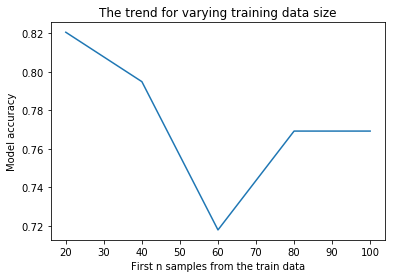

In [35]:
acc_dict = {}
acc_dict = dict(zip(x_train_sampling, acc))
for i, j in acc_dict.items():
    print('Using the first', i, 'samples, the validation accuracy is', j)
    
plot(x_train_sampling, acc);
plt.title('The trend for varying training data size');
plt.xlabel('First n samples from the train data');
plt.ylabel('Model accuracy');